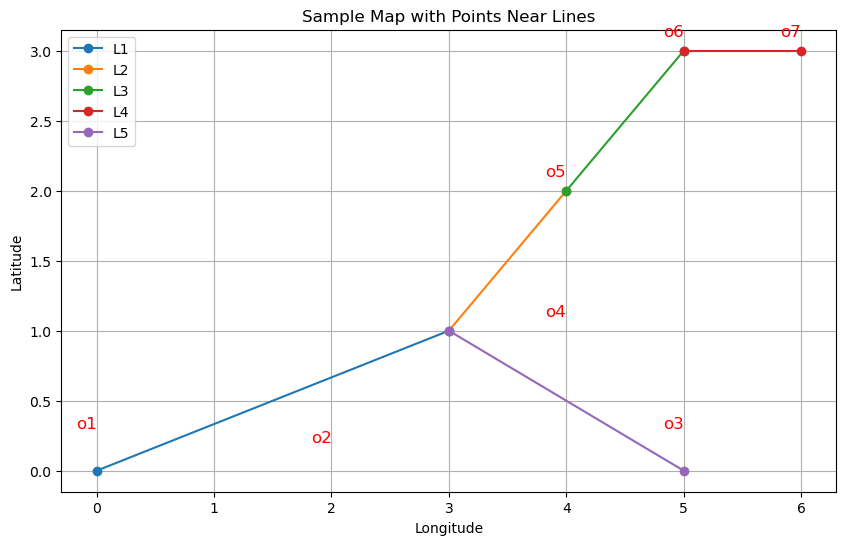

In [11]:
# Adjusted coordinates of points to be near the lines
adjusted_points = {
    'o1': (0, 0.3),
    'o2': (2, 0.2),
    'o3': (5, 0.3),
    'o4': (4, 1.1),
    'o5': (4, 2.1),
    'o6': (5, 3.1),
    'o7': (6, 3.1)
}

lines = {
    'L1': [(0, 0), (3, 1)],
    'L2': [(3, 1), (4, 2)],
    'L3': [(4, 2), (5, 3)],
    'L4': [(5, 3), (6, 3)],
    'L5': [(3, 1), (5, 0)]
}

# Plotting the points and lines with adjusted coordinates
plt.figure(figsize=(10, 6))
for line, coords in lines.items():
    x, y = zip(*coords)
    plt.plot(x, y, marker='o', label=line)

for point, coord in adjusted_points.items():
    plt.text(coord[0], coord[1], point, fontsize=12, ha='right', color='red')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Sample Map with Points Near Lines')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
### HMM模型在地图匹配中的转移概率矩阵、观察概率矩阵和初始状态向量。

In [14]:
import numpy as np

# 定义点和线段之间的距离
distances = np.array([
    [0.1, 0.4, 0.5, 0.6, 0.7],
    [0.3, 0.1, 0.5, 0.6, 0.7],
    [0.4, 0.5, 0.1, 0.3, 0.5],
    [0.5, 0.6, 0.3, 0.1, 0.4],
    [0.7, 0.6, 0.5, 0.4, 0.1]
])

# 观察点 o1 到 o8 和线段 L1 到 L5
num_obs = 8
num_links = 5

# 计算观察概率矩阵 (B)
B = np.zeros((num_obs, num_links))
for i in range(num_obs):
    for j in range(num_links):
        B[i, j] = 1 / distances[i % len(distances)][j]

# 正规化每一行使其成为概率分布
B = B / B.sum(axis=1, keepdims=True)

# 初始状态向量 (π) - 为简单起见假设均等概率
pi = np.ones(num_links) / num_links

# 转移概率矩阵 (A) - 简化示例
A = np.array([
    [0.6, 0.1, 0.1, 0.1, 0.1],
    [0.1, 0.6, 0.1, 0.1, 0.1],
    [0.1, 0.1, 0.6, 0.1, 0.1],
    [0.1, 0.1, 0.1, 0.6, 0.1],
    [0.1, 0.1, 0.1, 0.1, 0.6]
])

# 正规化每一行使其成为概率分布
A = A / A.sum(axis=1, keepdims=True)

print("观察概率矩阵 (B):\n", B)
print("转移概率矩阵 (A):\n", A)
print("初始状态向量 (π):\n", pi)


观察概率矩阵 (B):
 [[0.56833559 0.1420839  0.11366712 0.0947226  0.0811908 ]
 [0.18087855 0.54263566 0.10852713 0.09043928 0.07751938]
 [0.12605042 0.10084034 0.50420168 0.16806723 0.10084034]
 [0.1025641  0.08547009 0.17094017 0.51282051 0.12820513]
 [0.0811908  0.0947226  0.11366712 0.1420839  0.56833559]
 [0.56833559 0.1420839  0.11366712 0.0947226  0.0811908 ]
 [0.18087855 0.54263566 0.10852713 0.09043928 0.07751938]
 [0.12605042 0.10084034 0.50420168 0.16806723 0.10084034]]
转移概率矩阵 (A):
 [[0.6 0.1 0.1 0.1 0.1]
 [0.1 0.6 0.1 0.1 0.1]
 [0.1 0.1 0.6 0.1 0.1]
 [0.1 0.1 0.1 0.6 0.1]
 [0.1 0.1 0.1 0.1 0.6]]
初始状态向量 (π):
 [0.2 0.2 0.2 0.2 0.2]


In [19]:
### 假设我们有五条线段 L1,L2,L3,L4,L5，它们之间的转移概率如下：

In [22]:
import numpy as np
import pandas as pd

# 定义转移概率矩阵 (A)
A = np.array([
    [0.6, 0.1, 0.1, 0.1, 0.1],
    [0.1, 0.6, 0.1, 0.1, 0.1],
    [0.1, 0.1, 0.6, 0.1, 0.1],
    [0.1, 0.1, 0.1, 0.6, 0.1],
    [0.1, 0.1, 0.1, 0.1, 0.6]
])

# 将矩阵转换为 pandas DataFrame
df = pd.DataFrame(A, columns=['L1', 'L2', 'L3', 'L4', 'L5'], index=['L1', 'L2', 'L3', 'L4', 'L5'])

# 显示 DataFrame
df


,L1,L2,L3,L4,L5
L1,0.6,0.1,0.1,0.1,0.1
L2,0.1,0.6,0.1,0.1,0.1
L3,0.1,0.1,0.6,0.1,0.1
L4,0.1,0.1,0.1,0.6,0.1
L5,0.1,0.1,0.1,0.1,0.6


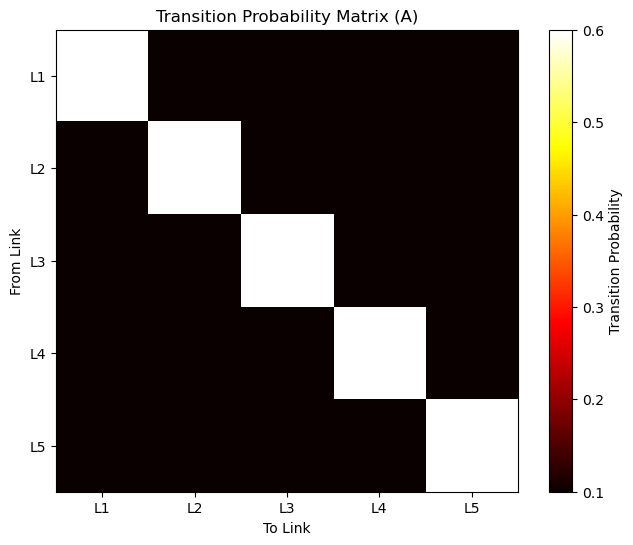

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 定义转移概率矩阵 (A)
A = np.array([
    [0.6, 0.1, 0.1, 0.1, 0.1],
    [0.1, 0.6, 0.1, 0.1, 0.1],
    [0.1, 0.1, 0.6, 0.1, 0.1],
    [0.1, 0.1, 0.1, 0.6, 0.1],
    [0.1, 0.1, 0.1, 0.1, 0.6]
])

# 绘制转移概率矩阵的热图
plt.figure(figsize=(8, 6))
plt.imshow(A, cmap='hot', interpolation='nearest')
plt.colorbar(label='Transition Probability')
plt.xticks(range(5), ['L1', 'L2', 'L3', 'L4', 'L5'])
plt.yticks(range(5), ['L1', 'L2', 'L3', 'L4', 'L5'])
plt.xlabel('To Link')
plt.ylabel('From Link')
plt.title('Transition Probability Matrix (A)')
plt.show()


In [ ]:
### 观察概率矩阵的热图，帮助我们直观地理解从不同观察点到不同链接的观察概率分布。

,L1,L2,L3,L4,L5
o1,0.1,0.4,0.5,0.6,0.7
o2,0.3,0.1,0.5,0.6,0.7
o3,0.4,0.5,0.1,0.3,0.5
o4,0.5,0.6,0.3,0.1,0.4
o5,0.7,0.6,0.5,0.4,0.1
o6,0.2,0.3,0.4,0.5,0.6
o7,0.5,0.2,0.4,0.3,0.5
o8,0.6,0.5,0.2,0.4,0.3


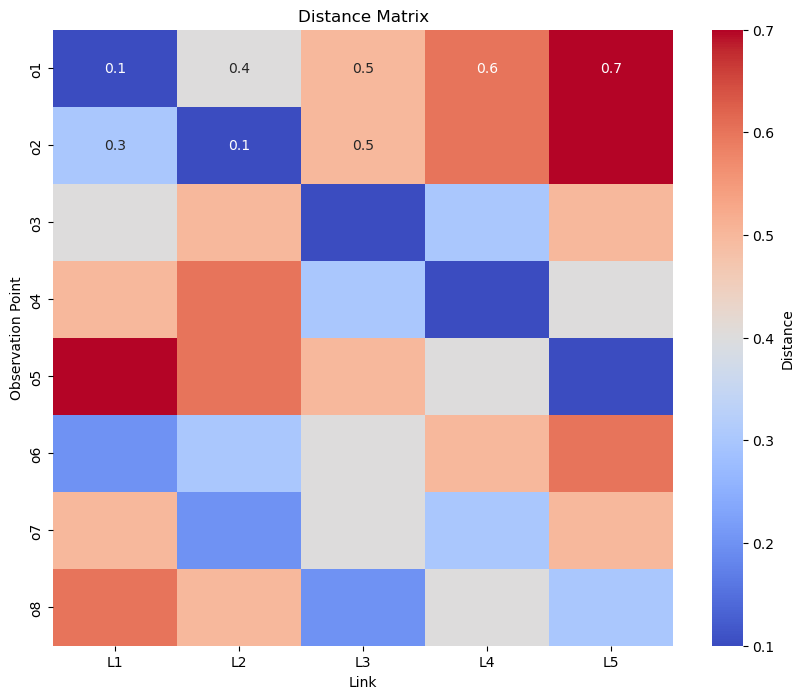

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假设的距离矩阵
distances = np.array([
    [0.1, 0.4, 0.5, 0.6, 0.7],
    [0.3, 0.1, 0.5, 0.6, 0.7],
    [0.4, 0.5, 0.1, 0.3, 0.5],
    [0.5, 0.6, 0.3, 0.1, 0.4],
    [0.7, 0.6, 0.5, 0.4, 0.1],
    [0.2, 0.3, 0.4, 0.5, 0.6],
    [0.5, 0.2, 0.4, 0.3, 0.5],
    [0.6, 0.5, 0.2, 0.4, 0.3]
])

# 将矩阵转换为 pandas DataFrame
df_distances = pd.DataFrame(distances, columns=['L1', 'L2', 'L3', 'L4', 'L5'], index=['o1', 'o2', 'o3', 'o4', 'o5', 'o6', 'o7', 'o8'])

# 显示 DataFrame
display(df_distances)

# 绘制距离矩阵的热图
plt.figure(figsize=(10, 8))
sns.heatmap(df_distances, annot=True, cmap='coolwarm', fmt=".1f", cbar_kws={'label': 'Distance'})
plt.xlabel('Link')
plt.ylabel('Observation Point')
plt.title('Distance Matrix')
plt.show()


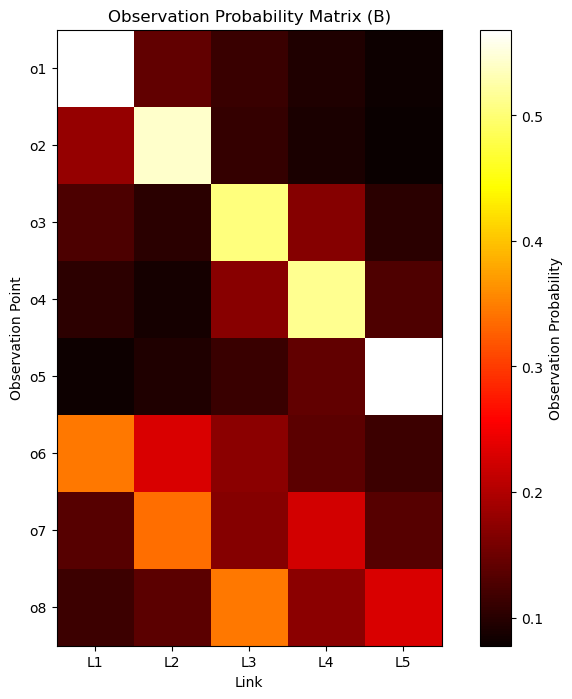

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# 假设的距离矩阵
distances = np.array([
    [0.1, 0.4, 0.5, 0.6, 0.7],
    [0.3, 0.1, 0.5, 0.6, 0.7],
    [0.4, 0.5, 0.1, 0.3, 0.5],
    [0.5, 0.6, 0.3, 0.1, 0.4],
    [0.7, 0.6, 0.5, 0.4, 0.1],
    [0.2, 0.3, 0.4, 0.5, 0.6],
    [0.5, 0.2, 0.4, 0.3, 0.5],
    [0.6, 0.5, 0.2, 0.4, 0.3]
])

# 计算观察概率矩阵 (B) 把上面distances 轉成 概率值为距离的倒数
B = np.zeros((distances.shape[0], distances.shape[1]))
for i in range(distances.shape[0]):
    for j in range(distances.shape[1]):
        B[i, j] = 1 / distances[i, j]

# 正规化每一行使其成为概率分布
B = B / B.sum(axis=1, keepdims=True)

# 绘制观察概率矩阵的热图
plt.figure(figsize=(10, 8))
plt.imshow(B, cmap='hot', interpolation='nearest')
plt.colorbar(label='Observation Probability')
plt.xticks(range(5), ['L1', 'L2', 'L3', 'L4', 'L5'])
plt.yticks(range(8), ['o1', 'o2', 'o3', 'o4', 'o5', 'o6', 'o7', 'o8'])
plt.xlabel('Link')
plt.ylabel('Observation Point')
plt.title('Observation Probability Matrix (B)')
plt.show()


In [ ]:
### 这段代码生成并显示了一个柱状图，展示了每个链接的初始概率。每个链接的初始概率都是均匀分布的，值为0.2。

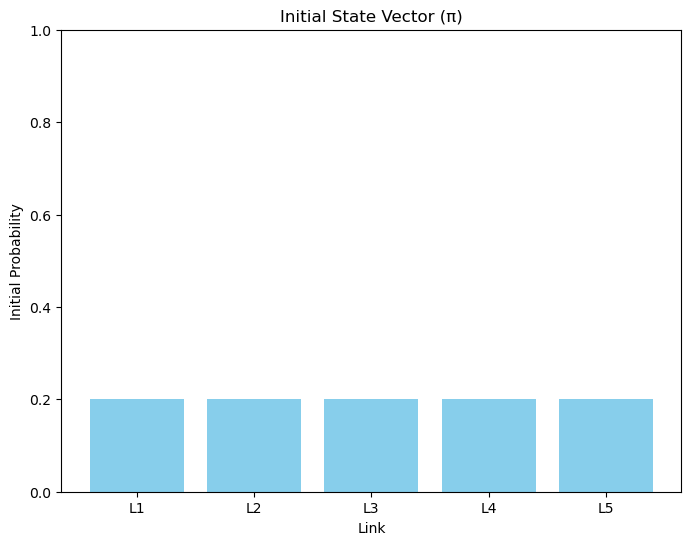

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# 定义初始状态向量 (π)
num_links = 5
pi = np.ones(num_links) / num_links

# 绘制初始状态向量的柱状图
plt.figure(figsize=(8, 6))
plt.bar(['L1', 'L2', 'L3', 'L4', 'L5'], pi, color='skyblue')
plt.xlabel('Link')
plt.ylabel('Initial Probability')
plt.title('Initial State Vector (π)')
plt.ylim(0, 1)
plt.show()


In [33]:
### ------------------實驗開始------------------
### 生成定义五条线段和八个观察点的经纬度：

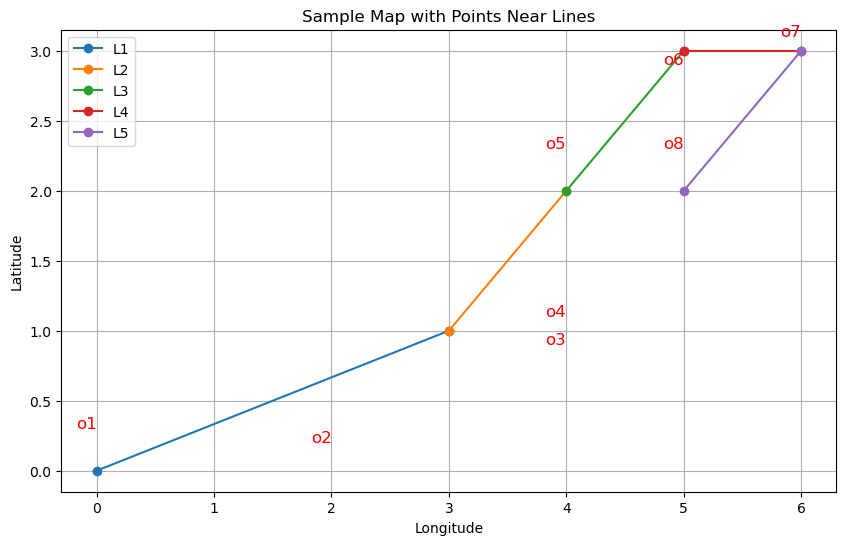

In [267]:
import numpy as np
import matplotlib.pyplot as plt

# 定义线段的起始和结束点 (经度, 纬度)
lines = {
    'L1': [(0, 0), (3, 1)],
    'L2': [(3, 1), (4, 2)],
    'L3': [(4, 2), (5, 3)],
    'L4': [(5, 3), (6, 3)],
    'L5': [(6, 3), (5, 2)]
}

# 定义八个观察点 (经度, 纬度)
points = {
    'o1': (0, 0.3),
    'o2': (2, 0.2),
    'o3': (4, 0.9),
    'o4': (4, 1.1),
    'o5': (4, 2.3),
    'o6': (5, 2.9),
    'o7': (6, 3.1),
    'o8': (5, 2.3)
}

# 绘制线段和观察点
plt.figure(figsize=(10, 6)) #定啲圖的size
for line, coords in lines.items(): #畫線
    x, y = zip(*coords)
    plt.plot(x, y, marker='o', label=line) 

for point, coord in points.items():
    plt.text(coord[0], coord[1], point, fontsize=12, ha='right', color='red') #畫點

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Sample Map with Points Near Lines')
plt.legend()
plt.grid(True)
plt.show()


In [67]:
### 计算观察概率矩阵B  和转移概率矩阵A  以及初始状态向量π 

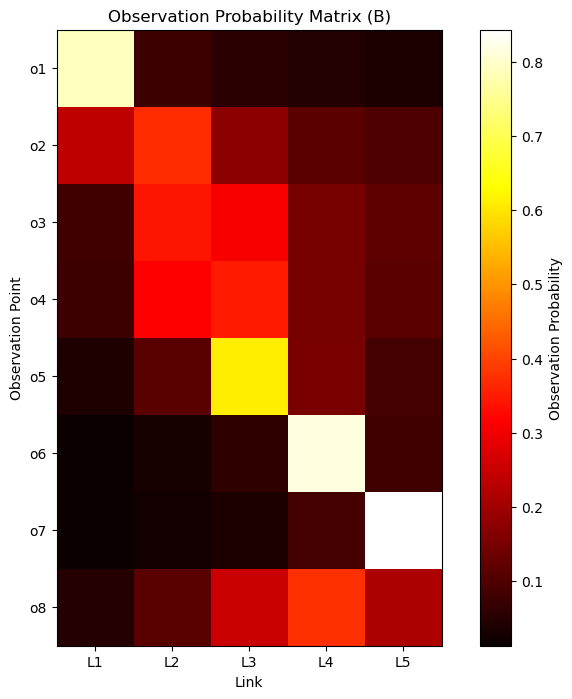

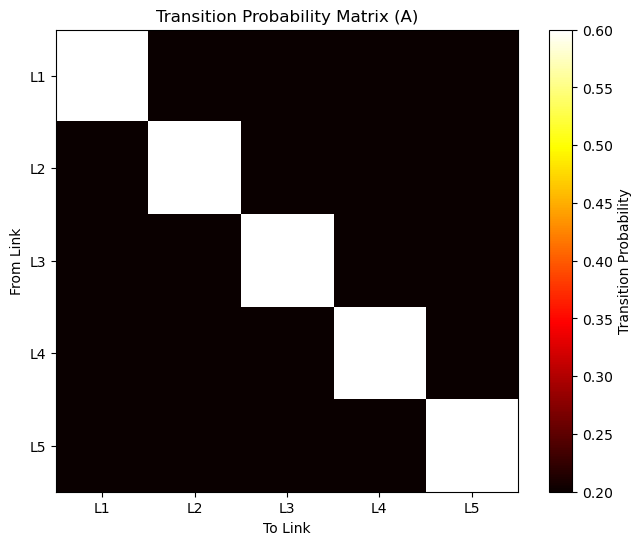

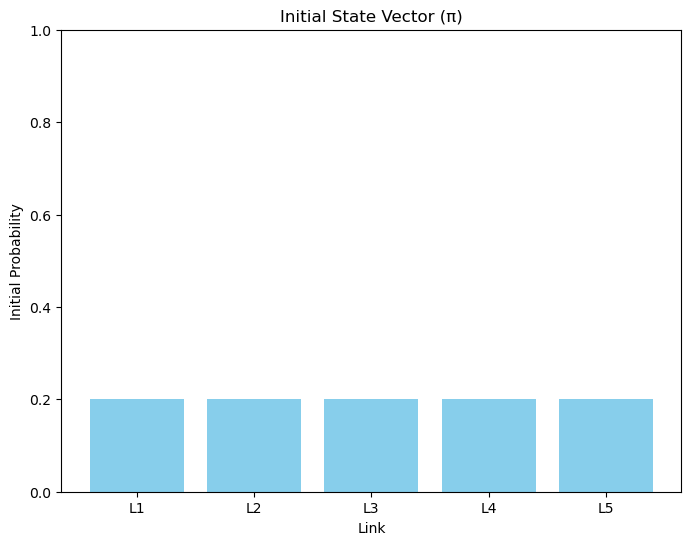

In [268]:
# 计算距离矩阵
def calculate_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

distances = np.zeros((len(points), len(lines)))
for i, (p_name, p_coords) in enumerate(points.items()):
    for j, (l_name, l_coords) in enumerate(lines.items()):
        distances[i, j] = calculate_distance(p_coords, l_coords[0])  # 计算到线段起点的距离

# 计算观察概率矩阵 (B)
B = np.zeros_like(distances)
for i in range(distances.shape[0]):
    for j in range(distances.shape[1]):
        B[i, j] = 1 / distances[i, j]

# 正规化每一行使其成为概率分布
B = B / B.sum(axis=1, keepdims=True)

# 初始状态向量 (π) - 假设均等概率
pi = np.ones(len(lines)) / len(lines)

# 转移概率矩阵 (A) - 简化示例
A = np.array([
    [0.6, 0.2, 0.2, 0.2, 0.2],
    [0.2, 0.6, 0.2, 0.2, 0.2],
    [0.2, 0.2, 0.6, 0.2, 0.2],
    [0.2, 0.2, 0.2, 0.6, 0.2],
    [0.2, 0.2, 0.2, 0.2, 0.6]
])

# 绘制观察概率矩阵的热图
plt.figure(figsize=(10, 8))
plt.imshow(B, cmap='hot', interpolation='nearest')
plt.colorbar(label='Observation Probability')
plt.xticks(range(len(lines)), list(lines.keys()))
plt.yticks(range(len(points)), list(points.keys()))
plt.xlabel('Link')
plt.ylabel('Observation Point')
plt.title('Observation Probability Matrix (B)')
plt.show()

# 绘制转移概率矩阵的热图
plt.figure(figsize=(8, 6))
plt.imshow(A, cmap='hot', interpolation='nearest')
plt.colorbar(label='Transition Probability')
plt.xticks(range(len(lines)), list(lines.keys()))
plt.yticks(range(len(lines)), list(lines.keys()))
plt.xlabel('To Link')
plt.ylabel('From Link')
plt.title('Transition Probability Matrix (A)')
plt.show()

# 绘制初始状态向量的柱状图
plt.figure(figsize=(8, 6))
plt.bar(list(lines.keys()), pi, color='skyblue')
plt.xlabel('Link')
plt.ylabel('Initial Probability')
plt.title('Initial State Vector (π)')
plt.ylim(0, 1)
plt.show()


In [ ]:
### 點到線段距離的做法

distance 1.2806248474865698 closest_point: [3 1]


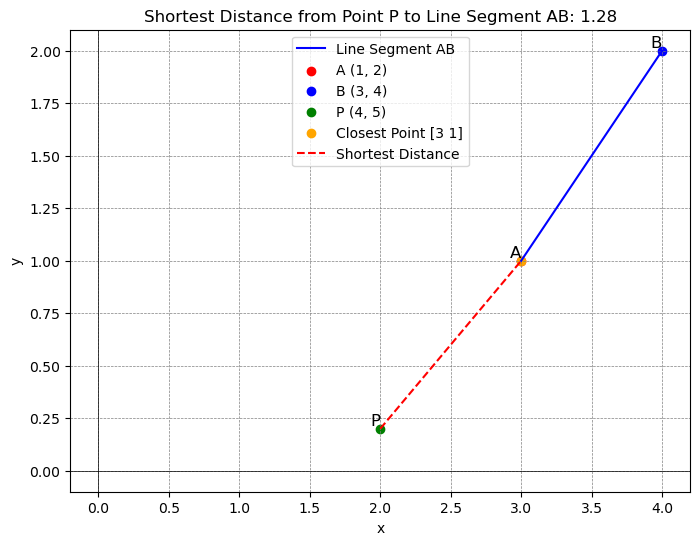

In [154]:
#導入所需模組：
import matplotlib.pyplot as plt
import numpy as np
#定義計算點到線段距離的函數：
def distance_point_to_segment(P, A, B):
    # 向量AP和AB
    AP = np.array([P[0] - A[0], P[1] - A[1]])
    AB = np.array([B[0] - A[0], B[1] - A[1]])
    AB_AB = np.dot(AB, AB) #使用點積計算 P 在 A ,B 之間的位置。
    AP_AB = np.dot(AP, AB)
    t = AP_AB / AB_AB
    #如果𝑡 < 0，則最近點為𝐴；如果𝑡>1，則最近點為𝐵；否則最近點在線段上。
    if t < 0.0:
        closest_point = A
    elif t > 1.0:
        closest_point = B
    else:
        closest_point = A + t * AB

    distance = np.linalg.norm(P - closest_point) #計算最近點到點 𝑃 的距離，並返回距離和最近點
    return distance, closest_point 

# 定義兩點的座標 A 和 B，以及點 P 的座標
A = np.array([3, 1])
B = np.array([4, 2])
P = np.array([2, 0.2])

# 計算距離和垂足
distance, closest_point = distance_point_to_segment(P, A, B)
print("distance",distance,"closest_point:", closest_point)
# 畫圖
plt.figure(figsize=(8, 6))
plt.plot([A[0], B[0]], [A[1], B[1]], label='Line Segment AB', color='blue') #線 AB
plt.scatter(*A, color='red', label='A (1, 2)') #點A
plt.scatter(*B, color='blue', label='B (3, 4)') #點B
plt.scatter(*P, color='green', label='P (4, 5)') #點P
plt.scatter(*closest_point, color='orange', label=f'Closest Point {closest_point}') #點P到AB最近點
plt.plot([P[0], closest_point[0]], [P[1], closest_point[1]], color='red', linestyle='--', label='Shortest Distance')#畫虛線

# 添加標籤
plt.text(A[0], A[1], 'A', fontsize=12, verticalalignment='bottom', horizontalalignment='right')
plt.text(B[0], B[1], 'B', fontsize=12, verticalalignment='bottom', horizontalalignment='right')
plt.text(P[0], P[1], 'P', fontsize=12, verticalalignment='bottom', horizontalalignment='right')

# 設置圖例和標題
plt.legend()
plt.title(f'Shortest Distance from Point P to Line Segment AB: {distance:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# 顯示圖形
plt.show()


In [69]:
### 使用Viterbi算法来求解每个观察点最大概率出现在哪条link上，并计算出投影值（实际真实位置）。
### 我们将基于前面定义的HMM模型的5个变量值（初始状态向量π、转移概率矩阵A、观察概率矩阵B）来实现。


In [42]:
### 改进观察概率矩阵的计算 實驗
### 1. 改进观察概率矩阵的计算：在计算观察概率矩阵 B 时，不仅考虑观察点到线段起点的距离，还可以考虑观察点到线段的垂直距离。
### 2. 调整转移概率矩阵：目前的转移概率矩阵可能不够精确，可以根据实际数据调整。
### 3. 增加观测信息：例如，除了距离，还可以引入方向和速度信息来改进观察概率。

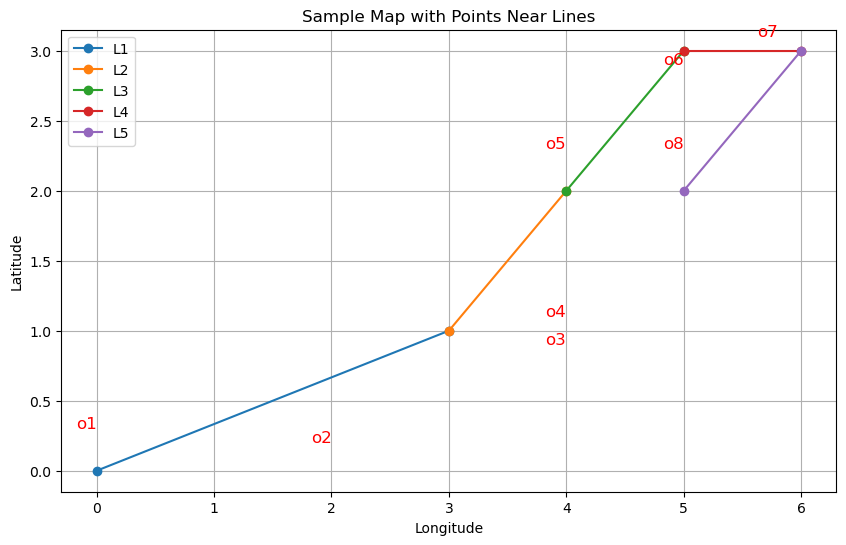

In [250]:
import numpy as np
import matplotlib.pyplot as plt

# 定義線段的起始和結束點 (經度, 緯度)
lines = {
    'L1': [(0, 0), (3, 1)],
    'L2': [(3, 1), (4, 2)],
    'L3': [(4, 2), (5, 3)],
    'L4': [(5, 3), (6, 3)],
    'L5': [(6, 3), (5, 2)]
}

# 定義八個觀察點 (經度, 緯度)
points = {
    'o1': (0, 0.3),
    'o2': (2, 0.2),
    'o3': (4, 0.9),
    'o4': (4, 1.1),
    'o5': (4, 2.3),
    'o6': (5, 2.9),
    'o7': (5.8, 3.1),
    'o8': (5, 2.3)
}

# 繪製線段和觀察點
plt.figure(figsize=(10, 6))
for line, coords in lines.items():
    x, y = zip(*coords)
    plt.plot(x, y, marker='o', label=line)

for point, coord in points.items():
    plt.text(coord[0], coord[1], point, fontsize=12, ha='right', color='red')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Sample Map with Points Near Lines')
plt.legend()
plt.grid(True)
plt.show()


In [251]:
# 定義計算點到線段距離的函數
def distance_point_to_segment(P, A, B):
    P = np.array(P)
    A = np.array(A)
    B = np.array(B)
    AP = P - A
    AB = B - A
    AB_AB = np.dot(AB, AB)
    AP_AB = np.dot(AP, AB)
    t = AP_AB / AB_AB
    
    if t < 0.0:
        closest_point = A
    elif t > 1.0:
        closest_point = B
    else:
        closest_point = A + t * AB

    distance = np.linalg.norm(P - closest_point)
    return distance

# 計算距離矩陣
distances = np.zeros((len(points), len(lines)))
for i, (p_name, p_coords) in enumerate(points.items()):
    for j, (l_name, l_coords) in enumerate(lines.items()):
        distances[i, j] = distance_point_to_segment(p_coords, l_coords[0], l_coords[1])


# 创建距离矩阵的DataFrame
distance_df = pd.DataFrame(distances, index=points.keys(), columns=lines.keys())

# 显示距离矩阵
print(distance_df)

          L1        L2        L3        L4        L5
o1  0.284605  3.080584  4.346263  5.682429  5.281098
o2  0.442719  1.280625  2.690725  4.103657  3.498571
o3  1.004988  0.777817  1.100000  2.325941  1.486607
o4  1.004988  0.636396  0.900000  2.147091  1.345362
o5  1.640122  0.300000  0.212132  1.220656  1.044031
o6  2.758623  1.345362  0.070711  0.100000  0.636396
o7  3.500000  2.109502  0.806226  0.100000  0.212132
o8  2.385372  1.044031  0.494975  0.700000  0.212132


In [252]:

# 计算观察概率矩阵 (B)
print("\n計算觀察概率矩陣 (B)")
B = np.zeros_like(distances)
for i in range(distances.shape[0]):
    for j in range(distances.shape[1]):
        B[i, j] = 1 / distances[i, j]

# 创建观察概率矩阵的DataFrame
B_df = pd.DataFrame(B, index=points.keys(), columns=lines.keys())
print(B_df)

print("\n正規化每一行使其成為概率分布")
# 正規化每一行使其成為概率分布
B = B / B.sum(axis=1, keepdims=True)

# 创建正規化后的概率矩阵的DataFrame
B_df_normalized = pd.DataFrame(B, index=points.keys(), columns=lines.keys())
print(B_df_normalized)

# 打印每个点最大概率所在的线及其概率
print("\n每個點最大概率所在的線及其概率")
max_prob_lines = B_df_normalized.idxmax(axis=1)
max_prob_values = B_df_normalized.max(axis=1)

for point in points.keys():
    print(f"{point} 最大概率在線 {max_prob_lines[point]}，概率為 {max_prob_values[point]:.4f}")



計算觀察概率矩陣 (B)
          L1        L2         L3         L4        L5
o1  3.513642  0.324614   0.230083   0.175981  0.189355
o2  2.258770  0.780869   0.371647   0.243685  0.285831
o3  0.995037  1.285649   0.909091   0.429934  0.672673
o4  0.995037  1.571348   1.111111   0.465746  0.743294
o5  0.609711  3.333333   4.714045   0.819232  0.957826
o6  0.362500  0.743294  14.142136  10.000000  1.571348
o7  0.285714  0.474045   1.240347  10.000000  4.714045
o8  0.419222  0.957826   2.020305   1.428571  4.714045

正規化每一行使其成為概率分布
          L1        L2        L3        L4        L5
o1  0.792490  0.073216  0.051894  0.039692  0.042708
o2  0.573175  0.198150  0.094307  0.061836  0.072531
o3  0.231815  0.299519  0.211792  0.100162  0.156713
o4  0.203628  0.321567  0.227382  0.095312  0.152111
o5  0.058434  0.319464  0.451790  0.078515  0.091797
o6  0.013516  0.027715  0.527312  0.372866  0.058590
o7  0.017094  0.028362  0.074209  0.598295  0.282039
o8  0.043944  0.100401  0.211773  0.149746  0.49413

In [253]:
# 计算每条线段的长度
def line_length(start, end):
    start = np.array(start)
    end = np.array(end)
    return np.linalg.norm(end - start)

line_lengths = {line: line_length(coords[0], coords[1]) for line, coords in lines.items()}
print("line_lengths:",line_lengths)
total_length = sum(line_lengths.values())

# 根据线段长度定义转移概率矩阵
n = len(lines)
A = np.zeros((n, n))
line_keys = list(lines.keys())

for i in range(n):
    for j in range(n):
        if i == j:
            A[i, j] = 0.3 + 0.7 * (line_lengths[line_keys[i]] / total_length) # 定義 A的 概率
        else:
            A[i, j] = 0.7 * (line_lengths[line_keys[j]] / total_length)

# 归一化转移概率矩阵的每一行
A = A / A.sum(axis=1, keepdims=True)

# 创建转移概率矩阵的 DataFrame
A_df = pd.DataFrame(A, index=line_keys, columns=line_keys)

# 显示转移概率矩阵
print(A_df)
print("\n",A)

line_lengths: {'L1': 3.1622776601683795, 'L2': 1.4142135623730951, 'L3': 1.4142135623730951, 'L4': 1.0, 'L5': 1.4142135623730951}
          L1        L2        L3        L4        L5
L1  0.563369  0.117782  0.117782  0.083285  0.117782
L2  0.263369  0.417782  0.117782  0.083285  0.117782
L3  0.263369  0.117782  0.417782  0.083285  0.117782
L4  0.263369  0.117782  0.117782  0.383285  0.117782
L5  0.263369  0.117782  0.117782  0.083285  0.417782

 [[0.56336893 0.11778217 0.11778217 0.08328457 0.11778217]
 [0.26336893 0.41778217 0.11778217 0.08328457 0.11778217]
 [0.26336893 0.11778217 0.41778217 0.08328457 0.11778217]
 [0.26336893 0.11778217 0.11778217 0.38328457 0.11778217]
 [0.26336893 0.11778217 0.11778217 0.08328457 0.41778217]]


In [254]:

# Viterbi算法
def viterbi(pi, A, B, observations, weight_A=1, weight_B=8, weight_pi=1):
    T = len(observations)  # 观测序列的长度（點的数量）
    print("\nT:",T)
    N = A.shape[0]         # 状态的数量（线段的数量）
    print("N:",N)
    
    # 初始化动态规划表格
    V = np.zeros((N, T))   # 存储最大概率
    path = np.zeros((N, T), dtype=int)  # 存储最优路径的索引
    
    # 初始状态概率
    V[:, 0] = pi * B[0, :]  # 计算第一个观测的初始状态概率(B的概率，distance出的 % ) #pi 要由一開始定義，現用平均值0.2
    print("B[0, :] ",B[0, :]) 
    print("V[:, 0] ",V[:, 0] ,"\n\n")
    
    # 动态规划填表
    for t in range(1, T):  # 从第二个观测开始
        for s in range(N):  # 对于每个状态
            # 计算从每个可能的前一个状态到当前状态的概率
            # prob = V[:, t-1] * A[:, s] *B[t, s]
            prob = V[:, t-1] ** weight_pi * A[:, s] ** weight_A * B[t, s] ** weight_B
            print("t,s:",t,s)
            print("prob:",prob)
            # 选择最大概率并存储
            V[s, t] = np.max(prob)
            # 存储最大概率的前一个状态索引
            path[s, t] = np.argmax(prob)
    
    # 终止状态
    final_state = np.argmax(V[:, T-1])  # 找到最后一个观测的最大概率状态
    best_path = [final_state]  # 初始化最佳路径
    
    # 回溯找到最佳路径
    for t in range(T-1, 0, -1):  # 从最后一个观测往前推
        final_state = path[final_state, t]  # 找到前一个状态
        best_path.insert(0, final_state)  # 插入到路径的前面
    
    return best_path, V  # 返回最佳路径和动态规划表格

# 觀察序列（觀察點的索引）
observations = list(points.keys())
print("observations:",observations)
# 使用Viterbi算法求解
best_path, V = viterbi(pi, A, B, observations)


observations: ['o1', 'o2', 'o3', 'o4', 'o5', 'o6', 'o7', 'o8']

T: 8
N: 5
B[0, :]  [0.79248991 0.07321552 0.05189437 0.03969193 0.04270827]
V[:, 0]  [0.15849798 0.0146431  0.01037887 0.00793839 0.00854165] 


t,s: 1 0
prob: [1.04019721e-03 4.49258948e-05 3.18429916e-05 2.43554310e-05
 2.62062925e-05]
t,s: 1 1
prob: [4.43660969e-08 1.45388811e-08 2.90521150e-09 2.22208010e-09
 2.39094439e-09]
t,s: 1 2
prob: [1.16807936e-10 1.07914985e-11 2.71312148e-11 5.85033638e-12
 6.29492562e-12]
t,s: 1 3
prob: [2.82191072e-12 2.60706988e-13 1.84786313e-13 6.50441959e-13
 1.52076294e-13]
t,s: 1 4
prob: [1.42988445e-11 1.32102290e-12 9.36326845e-13 7.16158962e-13
 2.73331419e-12]
t,s: 2 0
prob: [4.88691986e-09 9.74411510e-14 2.56544987e-16 6.19775566e-18
 3.14045176e-17]
t,s: 2 1
prob: [7.93571130e-09 1.20058181e-12 8.91133001e-16 2.15284838e-17
 1.09086528e-16]
t,s: 2 2
prob: [4.95981956e-10 2.11544343e-14 1.97557219e-16 1.34553024e-18
 6.81790802e-18]
t,s: 2 3
prob: [8.77613510e-13 3.74316387e-17 9

最佳路徑（觀察點所在的link）: ['L1', 'L1', 'L2', 'L2', 'L3', 'L3', 'L4', 'L5']


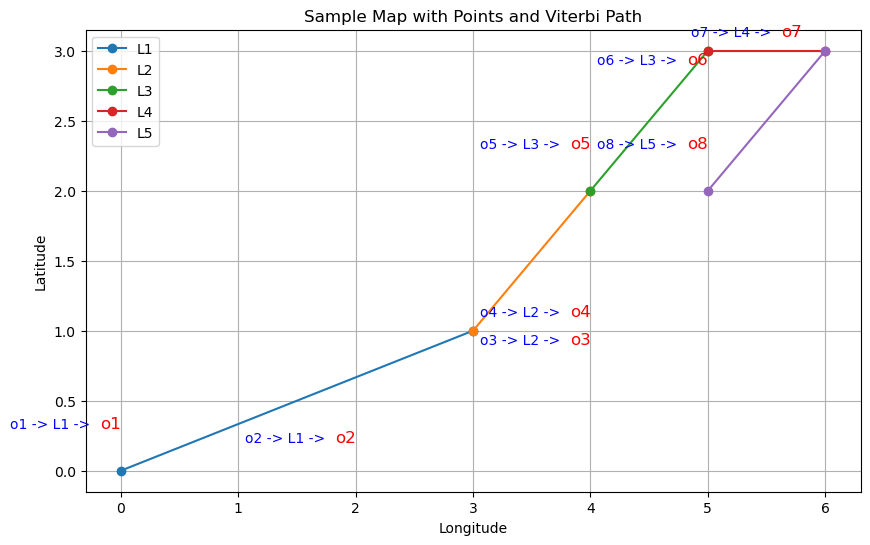

In [255]:

# 打印結果
print("最佳路徑（觀察點所在的link）:", [list(lines.keys())[i] for i in best_path])

# 繪製觀察點與最佳路徑的匹配結果
plt.figure(figsize=(10, 6))
for line, coords in lines.items():
    x, y = zip(*coords)
    plt.plot(x, y, marker='o', label=line)

for point, coord in points.items():
    plt.text(coord[0], coord[1], point, fontsize=12, ha='right', color='red')

for i, point in enumerate(observations):
    link = list(lines.keys())[best_path[i]]
    coord = points[point]
    plt.text(coord[0], coord[1], f"{point} -> {link} ->       ", fontsize=10, ha='right', color='blue')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Sample Map with Points and Viterbi Path')
plt.legend()
plt.grid(True)
plt.show()
